In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

from collections import Counter
import re

In [ ]:
############### Borzoi

In [3]:
targets_df = pd.read_csv('../data/Borzoi/targets_human.txt', sep='\t', index_col=0)
targets_df

,identifier,file,clip,clip_soft,scale,sum_stat,strand_pair,description
0,CNhs10608+,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,1,CAGE:Clontech Human Universal Reference Total ...
1,CNhs10608-,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,0,CAGE:Clontech Human Universal Reference Total ...
2,CNhs10610+,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,3,CAGE:SABiosciences XpressRef Human Universal T...
3,CNhs10610-,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,2,CAGE:SABiosciences XpressRef Human Universal T...
4,CNhs10612+,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,5,CAGE:Universal RNA - Human Normal Tissues Bioc...
...,...,...,...,...,...,...,...,...
7606,GTEX-13FTX-1026-SM-5J2O5.1,/home/drk/tillage/datasets/human/rna/recount3/...,768,384,0.010,sum_sqrt,7606,RNA:uterus
7607,GTEX-1MA7W-1526-SM-DHXKS.1,/home/drk/tillage/datasets/human/rna/recount3/...,768,384,0.010,sum_sqrt,7607,RNA:uterus
7608,GTEX-11EMC-1926-SM-5A5JU.1,/home/drk/tillage/datasets/human/rna/recount3/...,768,384,0.010,sum_sqrt,7608,RNA:vagina
7609,GTEX-12WSB-2426-SM-5EGJC.1,/home/drk/tillage/datasets/human/rna/recount3/...,768,384,0.010,sum_sqrt,7609,RNA:vagina


In [4]:
targets_df[['assay', 'cell_type']] = targets_df['description'].str.rsplit(':', n=1, expand=True)
targets_df

,identifier,file,clip,clip_soft,scale,sum_stat,strand_pair,description,assay,cell_type
0,CNhs10608+,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,1,CAGE:Clontech Human Universal Reference Total ...,CAGE,"Clontech Human Universal Reference Total RNA, ..."
1,CNhs10608-,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,0,CAGE:Clontech Human Universal Reference Total ...,CAGE,"Clontech Human Universal Reference Total RNA, ..."
2,CNhs10610+,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,3,CAGE:SABiosciences XpressRef Human Universal T...,CAGE,SABiosciences XpressRef Human Universal Total ...
3,CNhs10610-,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,2,CAGE:SABiosciences XpressRef Human Universal T...,CAGE,SABiosciences XpressRef Human Universal Total ...
4,CNhs10612+,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,5,CAGE:Universal RNA - Human Normal Tissues Bioc...,CAGE,"Universal RNA - Human Normal Tissues Biochain,..."
...,...,...,...,...,...,...,...,...,...,...
7606,GTEX-13FTX-1026-SM-5J2O5.1,/home/drk/tillage/datasets/human/rna/recount3/...,768,384,0.010,sum_sqrt,7606,RNA:uterus,RNA,uterus
7607,GTEX-1MA7W-1526-SM-DHXKS.1,/home/drk/tillage/datasets/human/rna/recount3/...,768,384,0.010,sum_sqrt,7607,RNA:uterus,RNA,uterus
7608,GTEX-11EMC-1926-SM-5A5JU.1,/home/drk/tillage/datasets/human/rna/recount3/...,768,384,0.010,sum_sqrt,7608,RNA:vagina,RNA,vagina
7609,GTEX-12WSB-2426-SM-5EGJC.1,/home/drk/tillage/datasets/human/rna/recount3/...,768,384,0.010,sum_sqrt,7609,RNA:vagina,RNA,vagina


In [5]:
targets_df['assay'] = targets_df['assay'].str.replace('DNASE', 'DNase').str.replace('CHIP:', '')
targets_df['index'] = targets_df.index

In [6]:
targets_df

,identifier,file,clip,clip_soft,scale,sum_stat,strand_pair,description,assay,cell_type,index
0,CNhs10608+,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,1,CAGE:Clontech Human Universal Reference Total ...,CAGE,"Clontech Human Universal Reference Total RNA, ...",0
1,CNhs10608-,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,0,CAGE:Clontech Human Universal Reference Total ...,CAGE,"Clontech Human Universal Reference Total RNA, ...",1
2,CNhs10610+,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,3,CAGE:SABiosciences XpressRef Human Universal T...,CAGE,SABiosciences XpressRef Human Universal Total ...,2
3,CNhs10610-,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,2,CAGE:SABiosciences XpressRef Human Universal T...,CAGE,SABiosciences XpressRef Human Universal Total ...,3
4,CNhs10612+,/home/drk/tillage/datasets/human/cage/fantom/C...,768,384,1.000,sum,5,CAGE:Universal RNA - Human Normal Tissues Bioc...,CAGE,"Universal RNA - Human Normal Tissues Biochain,...",4
...,...,...,...,...,...,...,...,...,...,...,...
7606,GTEX-13FTX-1026-SM-5J2O5.1,/home/drk/tillage/datasets/human/rna/recount3/...,768,384,0.010,sum_sqrt,7606,RNA:uterus,RNA,uterus,7606
7607,GTEX-1MA7W-1526-SM-DHXKS.1,/home/drk/tillage/datasets/human/rna/recount3/...,768,384,0.010,sum_sqrt,7607,RNA:uterus,RNA,uterus,7607
7608,GTEX-11EMC-1926-SM-5A5JU.1,/home/drk/tillage/datasets/human/rna/recount3/...,768,384,0.010,sum_sqrt,7608,RNA:vagina,RNA,vagina,7608
7609,GTEX-12WSB-2426-SM-5EGJC.1,/home/drk/tillage/datasets/human/rna/recount3/...,768,384,0.010,sum_sqrt,7609,RNA:vagina,RNA,vagina,7609


In [7]:
df_pivot = targets_df.pivot_table(
    values="index", 
    index="cell_type", 
    columns="assay", 
    aggfunc=list,
)

df_pivot

assay,ADNP,AEBP2,AFF1,AHR,ARHGAP35,ARID1B,ARID2,ARID3A,ARID4B,ARNT,ASCL2,ASH1L,ASH2L,ATAC,ATF1,ATF2,ATF3,ATF4,ATF5,ATF7,ATM,ATOH1,BACH1,BARHL1,BARX2,BATF,BCL11A,BCL11B,BCL3,BCL6,BCL6B,BCLAF1,BCOR,BHLHE40,BMAL1,BMAL1:BMAL1_6AN_ChIPSeq / U2OS cells stably expressing Bmal1:Luc / osteosarcoma cell line U2OS stably expressing Bmal1,BMAL1:BMAL1_DMSO_ChIPSeq / U2OS cells stably expressing Bmal1:Luc / osteosarcoma cell line U2OS stably expressing Bmal1,BMI1,BRCA1,BRD4,BRD9,C11orf30,CAGE,CAGE:B lymphoblastoid cell line,CAGE:Burkitt's lymphoma cell line,CAGE:Ewing's sarcoma cell line,CAGE:Hodgkin's lymphoma cell line,CAGE:Krukenberg tumor cell line,CAGE:NK T cell leukemia cell line,CAGE:Wilms' tumor cell line,CAGE:acantholytic squamous carcinoma cell line,CAGE:acute lymphoblastic leukemia (B-ALL) cell line,CAGE:acute lymphoblastic leukemia (T-ALL) cell line,CAGE:acute myeloid leukemia (FAB M0) cell line,CAGE:acute myeloid leukemia (FAB M1) cell line,CAGE:acute myeloid leukemia (FAB M2) cell line,CAGE:acute myeloid leukemia (FAB M3) cell line,CAGE:acute myeloid leukemia (FAB M4) cell line,CAGE:acute myeloid leukemia (FAB M4eo) cell line,CAGE:acute myeloid leukemia (FAB M5) cell line,CAGE:acute myeloid leukemia (FAB M6) cell line,CAGE:acute myeloid leukemia (FAB M7) cell line,CAGE:adenocarcinoma cell line,CAGE:adrenal cortex adenocarcinoma cell line,CAGE:adult T-cell leukemia cell line,CAGE:alveolar cell carcinoma cell line,CAGE:anaplastic carcinoma cell line,CAGE:anaplastic large cell lymphoma cell line,CAGE:anaplastic squamous cell carcinoma cell line,CAGE:argyrophil small cell carcinoma cell line,CAGE:astrocytoma cell line,CAGE:b cell line,CAGE:basal cell carcinoma cell line,CAGE:bile duct carcinoma cell line,CAGE:biphenotypic B myelomonocytic leukemia cell line,CAGE:bone marrow stromal cell line,CAGE:breast carcinoma cell line,CAGE:bronchial squamous cell carcinoma cell line,CAGE:bronchioalveolar carcinoma cell line,CAGE:bronchogenic carcinoma cell line,CAGE:carcinoid cell line,CAGE:carcinosarcoma cell line,CAGE:cervical cancer cell line,CAGE:cholangiocellular carcinoma cell line,CAGE:chondrosarcoma cell line,CAGE:choriocarcinoma cell line,CAGE:chronic lymphocytic leukemia (T-CLL) cell line,CAGE:chronic myeloblastic leukemia (CML) cell line,CAGE:chronic myelogenous leukemia (CML) cell line,CAGE:chronic myelogenous leukemia cell line,CAGE:clear cell carcinoma cell line,CAGE:colon carcinoma cell line,CAGE:cord blood derived cell line,CAGE:diffuse large B-cell lymphoma cell line,CAGE:ductal cell carcinoma cell line,CAGE:embryonic kidney cell line,CAGE:embryonic pancreas cell line,CAGE:endometrial carcinoma cell line,CAGE:endometrial stromal sarcoma cell line,CAGE:endometrioid adenocarcinoma cell line,CAGE:epidermoid carcinoma cell line,CAGE:epithelioid sarcoma cell line,CAGE:epitheloid carcinoma cell line,CAGE:extraskeletal myxoid chondrosarcoma cell line,CAGE:fibrosarcoma cell line,CAGE:fibrous histiocytoma cell line,CAGE:gall bladder carcinoma cell line,CAGE:gastric adenocarcinoma cell line,CAGE:gastric cancer cell line,CAGE:gastrointestinal carcinoma cell line,CAGE:giant cell carcinoma cell line,CAGE:glassy cell carcinoma cell line,CAGE:glioblastoma cell line,CAGE:glioma cell line,CAGE:granulosa cell tumor cell line,CAGE:hairy cell leukemia cell line,CAGE:hepatic mesenchymal tumor cell line,CAGE:hepatoblastoma cell line,CAGE:hepatocellular carcinoma cell line,CAGE:hepatoma cell line,CAGE:hereditary spherocytic anemia cell line,CAGE:keratoacanthoma cell line,CAGE:large cell lung carcinoma cell line,CAGE:large cell non-keratinizing squamous carcinoma cell line,CAGE:leiomyoblastoma cell line,CAGE:leiomyoma cell line,CAGE:leiomyosarcoma cell line,CAGE:lens epithelial cell line,"CAGE:leukemia, chronic megakaryoblastic cell line",CAGE:liposarcoma cell line,CAGE:lung adenocarcinoma cell line,"CAGE:lung adenocarcinoma, papillary cell line",CAGE:lymphangiectasia cell line,"CAGE:lymphoma, malignant, hairy B-cell cell line",CAGE:malignant trichi

In [9]:
assays = ['DNASE', 'CHIP:H3K4me3', 'CHIP:H3K27ac', 'CHIP:CTCF']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']

track_df = df_pivot.loc[cell_types, assays]
track_df

assay,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
cell_type,,,,,,,,
K562,"[1397, 1398, 1399, 1901]","[2199, 2708, 2881, 4930]",NaN,"[2196, 2882]",[2883],"[2197, 2707]",[2260],"[2195, 2510, 2709, 2841]"
HepG2,"[1303, 1367, 1510]","[2215, 2680, 4663]",NaN,"[2247, 2679]",[2270],[2678],[2328],[2402]
SK-N-SH,NaN,"[2935, 5833]","[2937, 4633]",[5676],"[2934, 4907]",[5844],"[2936, 4891]","[2865, 4550]"
HCT116,[1364],"[2671, 3920]","[2873, 4908]",[5368],"[2872, 3427]",[3215],[3484],"[2553, 2670, 3666]"
A549,[1323],[2600],NaN,NaN,NaN,NaN,NaN,"[2582, 2740]"


In [10]:
for assay in assays:
    indice1 = df_pivot.loc['SK-N-SH', assay]
    indice2 = df_pivot.loc['SK-N-SH treated with 6 uM all-trans-retinoic acid for 48 hours', assay]
    
    if isinstance(indice1, list) and isinstance(indice2, list):
        track_df.loc['SK-N-SH', assay] = indice1 + indice2
    elif isinstance(indice1, list) and not isinstance(indice2, list):
        track_df.loc['SK-N-SH', assay] = indice1
    elif not isinstance(indice1, list) and isinstance(indice2, list):
        track_df.loc['SK-N-SH', assay] = indice2
    else:
        track_df.loc['SK-N-SH', assay] = None

In [11]:
track_df

assay,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
cell_type,,,,,,,,
K562,"[1397, 1398, 1399, 1901]","[2199, 2708, 2881, 4930]",NaN,"[2196, 2882]",[2883],"[2197, 2707]",[2260],"[2195, 2510, 2709, 2841]"
HepG2,"[1303, 1367, 1510]","[2215, 2680, 4663]",NaN,"[2247, 2679]",[2270],[2678],[2328],[2402]
SK-N-SH,[1422],"[2935, 5833, 2732]","[2937, 4633]","[5676, 2731]","[2934, 4907]","[5844, 2730]","[2936, 4891]","[2865, 4550, 2465]"
HCT116,[1364],"[2671, 3920]","[2873, 4908]",[5368],"[2872, 3427]",[3215],[3484],"[2553, 2670, 3666]"
A549,[1323],[2600],NaN,NaN,NaN,NaN,NaN,"[2582, 2740]"


In [12]:

# for indice in df_pivot.loc['SK-N-SH treated with 6 uM all-trans-retinoic acid for 48 hours', assays]:
#     if isinstance(indice, list) and len(indice) > 0:
#         pred_feature = pred[:, :, indice].mean(2).mean(1)
#         true_label = MPRA_df['SK-N-SH']
#         r, _ = pearson(pred_feature, true_label)
#         print(indice, r)

In [13]:
# df_1 = df_pivot.loc[cell_types]
# df_1.notna().all(axis=0)
# df_1.loc[:, df_1.notna().sum(axis=0) >= 4]

In [14]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_my_processed_data_len200_norm.csv')
print(MPRA_df.shape)

(760679, 14)


In [18]:
# average every channel

# assays = ['DNASE', 'CHIP:H3K4me3', 'CHIP:H3K27ac', 'CHIP:CTCF']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']


pred_feature_matrix = np.full(shape=(len(pred), len(cell_types), len(assays)), fill_value=np.nan)

pearson_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = track_df.loc[cell_type, assay]
        if isinstance(indice, list) and len(indice) > 0:
            pred_feature = pred[:, :, indice].mean(2).mean(1)
            pred_feature_matrix[:, i, j] = pred_feature
            true_label = MPRA_df[cell_type]
            r, _ = pearson(pred_feature, true_label)
            pearson_df.loc[cell_type, assay] = r
            
pearson_df

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [32]:
pred_feature_matrix.shape

(760679, 5, 8)

In [34]:
save_h5('outputs/Gosai_MPRA_Borzoi_feature_matrix.h5', pred_feature_matrix)

<Axes: ylabel='Count'>

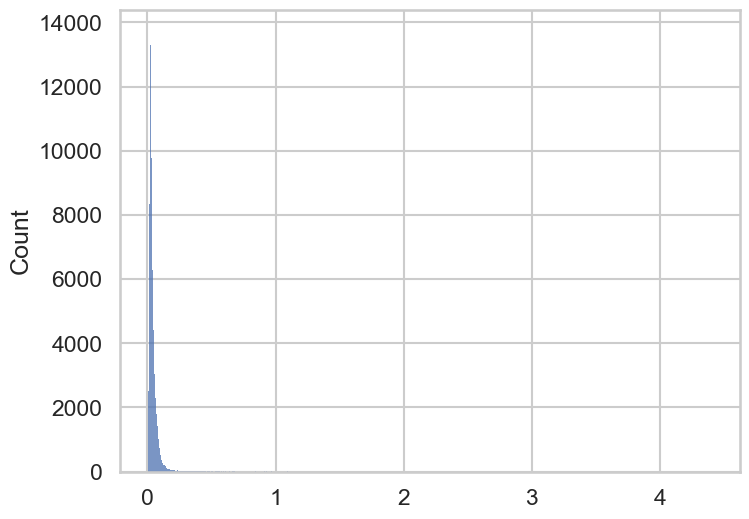

In [35]:
sns.histplot(pred_feature_matrix[:, 0, 0])

<Axes: xlabel='HepG2'>

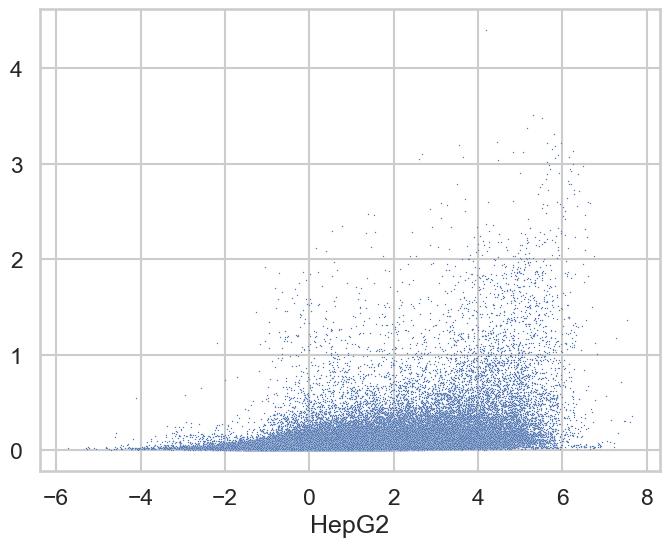

In [38]:
sns.scatterplot(x=MPRA_df['HepG2'], y=pred_feature_matrix[:, 0, 0], s=1)

In [2]:
# assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'H3K27me3', 'H3K4me1', 'H3K36me3', 'H3K9me3', 'CTCF']
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']

In [3]:
########## Enformer

model_info_df = pd.read_excel('../data/Enformer/41592_2021_1252_MOESM3_ESM.xlsx', sheet_name='Supplementary Table 2')
model_info_df

,index,genome,identifier,file,clip,scale,sum_stat,description,assay_type,target,assay_subtype,DNASE: cell-type agnostic,CAGE: cell-type agnostic,CAGE: IRF6,CAGE: TERT-GBM,CAGE: ZFAND3,"CAGE: HNF4A,MSMB,TERT-HEK293T,MYCrs6983267","CAGE: GP1BB,HBB,HBG1,PKLR","CAGE: F9,LDLR,SORT1",DNASE: IRF4,DNASE: IRF6,DNASE: ZFAND3,"DNASE: HNF4A,MSMB,TERT-HEK293T,MYCrs6983267","DNASE: GP1BB,HBB,HBG1,PKLR","DNASE: F9,LDLR,SORT1"
0,0,0,ENCFF833POA,/home/drk/tillage/datasets/human/dnase/encode/...,32,2,mean,DNASE:cerebellum male adult (27 years) and mal...,DNASE,DNase/cerebellum male adult (27 years) and mal...,DNase,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1,0,ENCFF110QGM,/home/drk/tillage/datasets/human/dnase/encode/...,32,2,mean,DNASE:frontal cortex male adult (27 years) and...,DNASE,DNase/frontal cortex male adult (27 years) and...,DNase,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,0,ENCFF880MKD,/home/drk/tillage/datasets/human/dnase/encode/...,32,2,mean,DNASE:chorion,DNASE,DNase/chorion,DNase,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,3,0,ENCFF463ZLQ,/home/drk/tillage/datasets/human/dnase/encode/...,32,2,mean,DNASE:Ishikawa treated with 0.02% dimethyl sul...,DNASE,DNase/Ishikawa treated with 0.02% dimethyl sul...,DNase,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,4,0,ENCFF890OGQ,/home/drk/tillage/datasets/human/dnase/encode/...,32,2,mean,DNASE:GM03348,DNASE,DNase/GM03348,DNase,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5308,5308,0,CNhs14239,/home/drk/tillage/datasets/human/cage/fantom/C...,384,1,sum,CAGE:epithelioid sarcoma cell line:HS-ES-2R,CAGE,CAGE/epithelioid sarcoma cell line:HS-ES-2R,CAGE,False,True,False,False,False,False,False,False,False,False,False,False,False,False
5309,5309,0,CNhs14240,/home/drk/tillage/datasets/human/cage/fantom/C...,384,1,sum,CAGE:squamous cell lung carcinoma cell line:RE...,CAGE,CAGE/squamous cell lung carcinoma cell line:RE...,CAGE,False,True,False,False,False,False,False,False,False,False,False,False,False,False
5310,5310,0,CNhs14241,/home/drk/tillage/datasets/human/cage/fantom/C...,384,1,sum,CAGE:gastric cancer cell line:GSS,CAGE,CAGE/gastric cancer cell line:GSS,CAGE,False,True,False,False,False,False,False,False,False,False,False,False,False,False
5311,5311,0,CNhs14244,/home/drk/tillage/datasets/human/cage/fantom/C...,384,1,sum,CAGE:carcinoid cell line:NCI-H727,CAGE,CAGE/carcinoid cell line:NCI-H727,CAGE,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
model_info_df = model_info_df[['index', 'target']].copy()
model_info_df[['assay', 'cell_type']] = model_info_df['target'].str.split('/', n=1, expand=True)
model_info_df['assay'] = model_info_df['assay'].str.replace('ChIP-Histone:', '').str.replace('ChIP-TF:', '')
model_info_df

,index,target,assay,cell_type
0,0,DNase/cerebellum male adult (27 years) and mal...,DNase,cerebellum male adult (27 years) and male adul...
1,1,DNase/frontal cortex male adult (27 years) and...,DNase,frontal cortex male adult (27 years) and male ...
2,2,DNase/chorion,DNase,chorion
3,3,DNase/Ishikawa treated with 0.02% dimethyl sul...,DNase,Ishikawa treated with 0.02% dimethyl sulfoxide...
4,4,DNase/GM03348,DNase,GM03348
...,...,...,...,...
5308,5308,CAGE/epithelioid sarcoma cell line:HS-ES-2R,CAGE,epithelioid sarcoma cell line:HS-ES-2R
5309,5309,CAGE/squamous cell lung carcinoma cell line:RE...,CAGE,squamous cell lung carcinoma cell line:RERF-LC-AI
5310,5310,CAGE/gastric cancer cell line:GSS,CAGE,gastric cancer cell line:GSS
5311,5311,CAGE/carcinoid cell line:NCI-H727,CAGE,carcinoid cell line:NCI-H727


In [5]:
pattern = '|'.join(map(re.escape, cell_types))  # 正则安全拼接
model_info_df['flag'] = model_info_df['cell_type'].astype(str).str.contains(pattern, na=False)

model_info_df[model_info_df['flag']]

,index,target,assay,cell_type,flag
27,27,DNase/HepG2,DNase,HepG2,True
33,33,DNase/K562 treated with 1 uM vorinostat for 72...,DNase,K562 treated with 1 uM vorinostat for 72 hours,True
34,34,DNase/K562 G2 phase,DNase,K562 G2 phase,True
35,35,DNase/K562 G1 phase,DNase,K562 G1 phase,True
47,47,DNase/A549,DNase,A549,True
...,...,...,...,...,...
4510,4510,ChIP-TF:NRF1/K562,NRF1,K562,True
4828,4828,CAGE/chronic myelogenous leukemia cell line:K562,CAGE,chronic myelogenous leukemia cell line:K562,True
4852,4852,CAGE/lung adenocarcinoma cell line:A549,CAGE,lung adenocarcinoma cell line:A549,True
5109,5109,CAGE/hepatocellular carcinoma cell line: HepG2...,CAGE,hepatocellular carcinoma cell line: HepG2 ENCO...,True


In [6]:
df_pivot = model_info_df.pivot_table(
    values="index", 
    index="cell_type", 
    columns="assay", 
    aggfunc=list,
)
df_pivot

assay,.,3xFLAG-AHR,3xFLAG-ARID4B,3xFLAG-ATF1,3xFLAG-ATF4,3xFLAG-BCL6,3xFLAG-CEBPA,3xFLAG-CEBPG,3xFLAG-CREB1,3xFLAG-DMAP1,3xFLAG-DNMT3B,3xFLAG-DRAP1,3xFLAG-ELF3,3xFLAG-ERF,3xFLAG-ETV5,3xFLAG-FOXA3,3xFLAG-FOXP1,3xFLAG-GABPA,3xFLAG-GABPB1,3xFLAG-GATAD1,3xFLAG-GATAD2A,3xFLAG-GMEB2,3xFLAG-HBP1,3xFLAG-HHEX,3xFLAG-HLF,3xFLAG-HMG20A,3xFLAG-HMG20B,3xFLAG-HOMEZ,3xFLAG-IKZF5,3xFLAG-IRF2,3xFLAG-KAT7,3xFLAG-KAT8,3xFLAG-KDM1A,3xFLAG-KDM3A,3xFLAG-KDM6A,3xFLAG-KLF11,3xFLAG-KLF16,3xFLAG-KLF6,3xFLAG-KLF9,3xFLAG-KMT2B,3xFLAG-MBD1,3xFLAG-MIER2,3xFLAG-MIER3,3xFLAG-MIXL1,3xFLAG-MLX,3xFLAG-MXD3,3xFLAG-MXD4,3xFLAG-MYRF,3xFLAG-NFIA,3xFLAG-NFIL3,3xFLAG-NFKBIZ,3xFLAG-NFYC,3xFLAG-NR2F1,3xFLAG-NR2F6,3xFLAG-PAF1,3xFLAG-PBX2,3xFLAG-PHF5A,3xFLAG-PPARG,3xFLAG-RAD21,3xFLAG-RARA,3xFLAG-RBPJ,3xFLAG-RCOR2,3xFLAG-RERE,3xFLAG-RFX3,3xFLAG-RFXANK,3xFLAG-RXRB,3xFLAG-SAP130,3xFLAG-SLC30A9,3xFLAG-SMAD4,3xFLAG-SOX13,3xFLAG-SOX5,3xFLAG-SP5,3xFLAG-SSRP1,3xFLAG-TEAD1,3xFLAG-TEAD3,3xFLAG-TFE3,3xFLAG-TGIF2,3xFLAG-THAP11,3xFLAG-THRB,3xFLAG-ZBED5,3xFLAG-ZBTB25,3xFLAG-ZBTB26,3xFLAG-ZFP1,3xFLAG-ZFP64,3xFLAG-ZGPAT,3xFLAG-ZKSCAN8,3xFLAG-ZNF146,3xFLAG-ZNF205,3xFLAG-ZNF3,3xFLAG-ZNF48,3xFLAG-ZNF511,3xFLAG-ZNF580,3xFLAG-ZNF614,3xFLAG-ZNF639,3xFLAG-ZNF644,3xFLAG-ZNF652,3xFLAG-ZNF7,3xFLAG-ZNF792,3xFLAG-ZSCAN9,AFF1,AGO1,AGO2,ARHGAP35,ARID1B,ARID2,ARID3A,ARNT,ASH1L,ASH2L,ATAC,ATF2,ATF3,ATF4,ATF7,ATM,BACH1,BATF,BCL11A,BCL3,BCLAF1,BCOR,BHLHE40,BMAL1,BMI1,BRCA1,BRD4,BRD9,C11orf30,CAGE,CBFA2T2,CBFA2T3,CBFB,CBX1,CBX2,CBX3,CBX5,CBX8,CC2D1A,CCAR2,CDC5L,CEBPB,CEBPZ,CEBPb,CHAMP1,CHD1,CHD2,CHD4,CHD7,CLOCK,COPS2,CREB1,CREB3L1,CREBBP,CREM,CSDE1,CTBP1,CTBP2,CTCF,CUX1,DACH1,DDX20,DEAF1,DEK,DNMT1,DNase,DPF2,E2F1,E2F4,E2F6,E2F7,E2F8,E4F1,EBF1,EED,EGR1,EHMT2,ELF1,ELF4,ELK1,EP300,EP400,ESR1,ESRRA,ETS1,ETV4,ETV6,EWSR1,EZH2,EZH2phosphoT487,FIP1L1,FOS,FOSL1,FOSL2,FOXA1,FOXA2,FOXK2,FOXM1,FOXP1,FOXP2,FUS,GABPA,GABPB1,GATA1,GATA2,GATA3,GATA4,GATAD2A,GATAD2B,GMEB1,GR,GTF2F1,H2AFZ,H2AK5ac,H2AK9ac,H2BK120ac,H2BK12ac,H2BK15ac,H2BK20ac,H2BK5ac,H3F3A,H3K14ac,H3K18ac,H3K23ac,H3K23me2,H3K27Ac,H3K27ac,H3K27me3,H3K36me3,H3K4ac,H3K4me1,H3K4me2,H3K4me3,H3K56ac,H3K79me1,H3K79me2,H3K9ac,H3K9me1,H3K9me2,H3K9me3,H3T11ph,H4K12ac,H4K20me1,H4K5ac,H4K8ac,H4K91ac,HCFC1,HDAC1,HDAC2,HDAC3,HDAC6,HDGF,HES1,HLTF,HMBOX1,HNF1A,HNF4A,HNF4G,HNRNPH1,HNRNPK,HNRNPL,HNRNPLL,HNRNPUL1,HSF1,IKZF1,IKZF2,ILF3,IRF1,IRF2,IRF3,IRF4,IRF5,JUN,JUNB,JUND,KAT2A,KAT2B,KAT8,KDM1A,KDM4A,KDM4B,KDM5A,KDM5B,KHSRP,KLF16,KLF5,L3MBTL2,LARP7,LCORL,LEF1,MAFF,MAFK,MAX,MAZ,MBD2,MCM2,MCM3,MCM5,MCM7,MEF2A,MEF2B,MEF2C,MEIS2,MGA,MIER1,MITF,MLLT1,MNT,MTA1,MTA2,MTA3,MXI1,MYB,MYBL2,MYC,MYNN,NANOG,NBN,NCOA1,NCOA2,NCOA3,NCOA4,NCOA6,NCOR1,NEUROD1,NFATC1,NFATC3,NFE2,NFE2L2,NFIB,NFIC,NFRKB,NFXL1,NFYA,NFYB,NKRF,NONO,NR0B1,NR2C1,NR2C2,NR2F1,NR2F2,NR2F6,NR3C1,NRF1,NUFIP1,PAX5,PAX8,PBX3,PCBP1,PCBP2,PHB2,PHF20,PHF21A,PHF8,PKNOX1,PLRG1,PML,POLR2A,POLR2AphosphoS2,POLR2AphosphoS5,POLR2B,POLR2G,POU2F2,POU5F1,PPP1R10,PRDM10,PRPF4,PTBP1,PYGO2,RAD21,RAD51,RB1,RBBP5,RBFOX2,RBM14,RBM15,RBM17,RBM22,RBM25,RBM34,RBM39,RCOR1,RELB,REST,RFX1,RFX5,RLF,RNAPII,RNF2,RUNX1,RUNX3,RXRA,SAFB,SAFB2,SAP30,SETDB1,SFPQ,SIN3A,SIN3B,SIRT6,SIX4,SIX5,SKI,SKIL,SMAD1,SMAD2,SMAD5,SMARCA4,SMARCA5,SMARCB1,SMARCC2,SMARCE1,SMC3,SNIP1,SNRNP70,SOX13,SOX6,SP1,SPI1,SREBF1,SREBF2,SRF,SRSF1,SRSF3,SRSF4,SRSF7,SRSF9,STAT1,STAT2,STAT3,STAT5A,SUPT20H,SUPT5H,SUZ12,SYNCRIP,TAF1,TAF15,TAF7,TAF9B,TAL1,TARDBP,TBL1XR1,TBP,TBX21,TBX3,TCF12,TCF7,TCF7L2,TEAD4,TFAP4,THAP1,THRA,THRAP3,TOE1,TRIM22,TRIM24,TRIM25,TRIM28,TRIP13,U2AF1,U2AF2,UBTF,USF1,USF2,WHSC1,WRNIP1,XRCC3,XRCC5,YBX1,YBX3,YY1,ZBED1,ZBTB1,ZBTB11,ZBTB2,ZBTB33,ZBTB40,ZBTB5,ZBTB7A,ZBTB7B,ZBTB8A,ZC3H11A,ZC3H8,ZEB1,ZEB2,ZFP36,ZFP91,ZFX,ZHX1,ZHX2,ZKSCAN1,ZMIZ1,ZMYM3,ZNF143,ZNF184,ZNF207,ZNF217,ZNF24,ZNF263,ZNF274,ZNF280A,ZNF282,ZNF316,ZNF318,ZNF384,ZNF407,ZNF444,ZNF507,ZNF512B,ZNF574,ZNF579,ZNF592,ZNF622,ZNF639,ZNF687,ZNF8,ZNF830,ZSCAN29,ZZZ3,abcam,active,eGFP-ADNP,eGFP-AEBP2,eGFP-ATF1,eGFP-ATF2,eGFP-ATF3,eGFP-BACH1,eGFP-BCL11A,eGFP-BCL11B,eGFP-BCL6B,eGFP-CEBPB,eGFP-CEBPG,eGFP-CREB3,eGFP-CT

In [7]:
df_avail = df_pivot[['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']]
df_avail = df_avail[(df_avail.isna().sum(axis=1) == 0)]
df_avail

assay,DNase,H3K4me3,H3K27ac,CTCF
cell_type,,,,
A673,[340],[2783],[3657],[3336]
AG04450,[49],[1109],[1107],[1108]
CD14-positive monocyte female,"[41, 131]","[821, 1215]",[817],[836]
GM12878,"[12, 69]","[686, 1143, 1620]",[688],"[687, 1265]"
GM23338 male adult (53 years) originated from GM23248,[166],[3463],[3702],"[4324, 4474]"
H1-hESC,"[19, 70, 565]","[1509, 3972]","[732, 4164]","[712, 989, 1074]"
HCT116,[88],"[1173, 2467]","[1379, 3485]","[1055, 1172, 2203]"
HeLa-S3,"[25, 654]","[745, 2493]",[743],[742]
IMR-90,[405],[1719],[1452],[1322]


In [8]:
track_df = df_pivot.loc[cell_types + ['SK-N-SH treated with 6 uM all-trans-retinoic acid for 48 hours'], assays + ['CAGE']]
track_df

assay,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF,CAGE
cell_type,,,,,,,,,
K562,"[121, 122, 123, 625]","[701, 1210, 1387, 3507]",NaN,"[698, 1388]",[1389],"[699, 1209]",[762],"[697, 1012, 1211, 1347]",NaN
HepG2,"[27, 91, 234]","[717, 1182, 3227]",NaN,"[749, 1181]",[772],[1180],[830],[904],NaN
SK-N-SH,NaN,"[1441, 4439]","[1443, 3194]",[4279],"[1440, 3484]",[4450],"[1442, 3466]","[1371, 3110]",NaN
HCT116,[88],"[1173, 2467]","[1379, 3485]",[3958],"[1378, 1956]",[1733],[2015],"[1055, 1172, 2203]",NaN
A549,[47],[1102],NaN,NaN,NaN,NaN,NaN,"[1084, 1242]",NaN
SK-N-SH treated with 6 uM all-trans-retinoic acid for 48 hours,[146],[1234],NaN,[1233],NaN,[1232],NaN,[967],NaN


In [9]:
track_df.loc['SK-N-SH', 'DNase'] = track_df.loc['SK-N-SH treated with 6 uM all-trans-retinoic acid for 48 hours', 'DNase']
track_df

assay,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF,CAGE
cell_type,,,,,,,,,
K562,"[121, 122, 123, 625]","[701, 1210, 1387, 3507]",NaN,"[698, 1388]",[1389],"[699, 1209]",[762],"[697, 1012, 1211, 1347]",NaN
HepG2,"[27, 91, 234]","[717, 1182, 3227]",NaN,"[749, 1181]",[772],[1180],[830],[904],NaN
SK-N-SH,[146],"[1441, 4439]","[1443, 3194]",[4279],"[1440, 3484]",[4450],"[1442, 3466]","[1371, 3110]",NaN
HCT116,[88],"[1173, 2467]","[1379, 3485]",[3958],"[1378, 1956]",[1733],[2015],"[1055, 1172, 2203]",NaN
A549,[47],[1102],NaN,NaN,NaN,NaN,NaN,"[1084, 1242]",NaN
SK-N-SH treated with 6 uM all-trans-retinoic acid for 48 hours,[146],[1234],NaN,[1233],NaN,[1232],NaN,[967],NaN


In [10]:
pred = load_h5('outputs/Gosai_MPRA_Enformer_pred.h5')
pred.shape

(760679, 2, 5313)

In [11]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_my_processed_data_len200_norm.csv')
print(MPRA_df.shape)

(760679, 14)


In [14]:
# average every channel

pearson_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        indice = track_df.loc[cell_type, assay]
        if isinstance(indice, list) and len(indice) > 0:
            for idx in indice:
                pred_feature = pred[:, :, idx].mean(1)
                true_label = MPRA_df[cell_type]
                r, _ = pearson(pred_feature, true_label)
                print(cell_type, assay, idx, r)
            

            pred_feature = pred[:, :, indice].mean(2).mean(1)
            true_label = MPRA_df[cell_type]
            r, _ = pearson(pred_feature, true_label)
            pearson_df.loc[cell_type, assay] = r
            MPRA_df[f'{cell_type}_{assay}'] = pred_feature
        
        else:
            MPRA_df[f'{cell_type}_{assay}'] = np.nan
            pearson_df.loc[cell_type, assay] = np.nan
pearson_df

K562 DNase 121 0.4816071363277534
K562 DNase 122 0.4644253456390126
K562 DNase 123 0.4131292168590919
K562 DNase 625 0.4816063723944516
K562 H3K4me3 701 0.5021894400924606
K562 H3K4me3 1210 0.4376592465589576
K562 H3K4me3 1387 0.4032735113679041
K562 H3K4me3 3507 0.3936855959824625
K562 H3K27me3 698 -0.05135279232607541
K562 H3K27me3 1388 0.02188673078041813
K562 H3K4me1 1389 0.45421127525188604
K562 H3K36me3 699 0.04575043986775213
K562 H3K36me3 1209 0.17765191512124914
K562 H3K9me3 762 0.10622974925469765
K562 CTCF 697 0.20051753499180994
K562 CTCF 1012 0.2907718944359341
K562 CTCF 1211 0.20491694559927867
K562 CTCF 1347 0.3171555814117574
HepG2 DNase 27 0.27880721326309493
HepG2 DNase 91 0.31399730755736893
HepG2 DNase 234 0.2954469807537239
HepG2 H3K4me3 717 0.40260261905845723
HepG2 H3K4me3 1182 0.3148607856280888
HepG2 H3K4me3 3227 0.2340740827940256
HepG2 H3K27me3 749 0.08746622839763585
HepG2 H3K27me3 1181 0.08126257360407291
HepG2 H3K4me1 772 0.3265737401472801
HepG2 H3K36me3 

,DNase,H3K4me3,H3K27ac,H3K27me3,H3K4me1,H3K36me3,H3K9me3,CTCF
K562,0.487,0.451,NaN,-0.003,0.454,0.122,0.106,0.244
HepG2,0.356,0.359,NaN,0.086,0.327,0.124,-0.040,0.168
SK-N-SH,0.363,0.447,0.380,0.023,0.305,-0.061,-0.003,0.152
HCT116,0.439,0.501,0.521,-0.135,0.485,-0.003,-0.102,0.172
A549,0.361,0.344,NaN,NaN,NaN,NaN,NaN,0.175


In [15]:
MPRA_df.to_csv('../data/Gosai_MPRA/Gosai_MPRA_Enformer_feature_0504.csv', index=False)

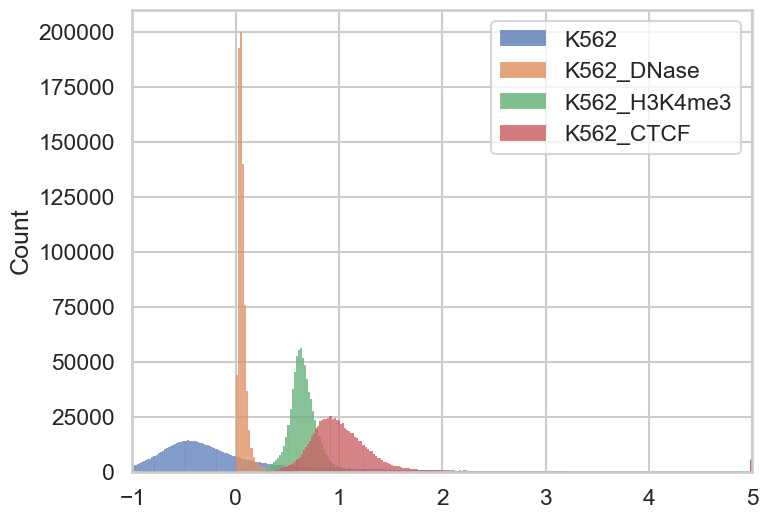

In [39]:
for col in MPRA_df.columns:
    if 'K562' in col:
        x = np.array(MPRA_df[col])
        x[x>5] = 5
        sns.histplot(x, label=col, binwidth=2e-2)
plt.xlim(-1, 5)
plt.legend()

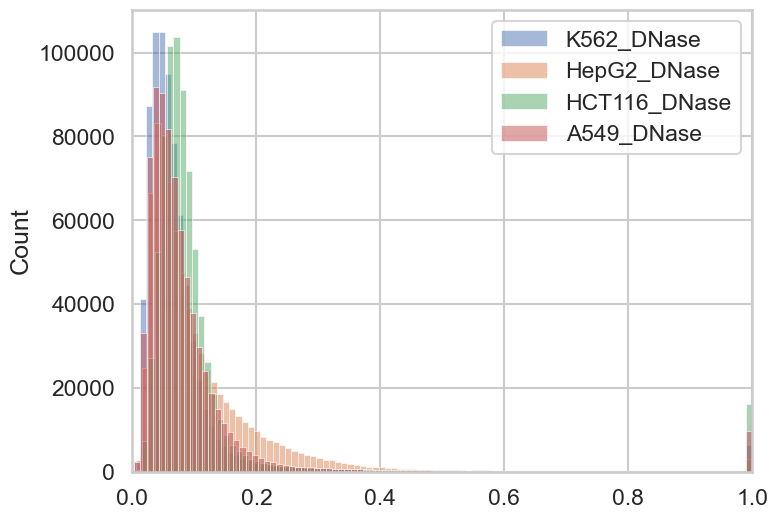

In [40]:
for col in MPRA_df.columns:
    if 'DNase' in col:
        x = np.array(MPRA_df[col])
        x[x>1] = 1
        sns.histplot(x, label=col, binwidth=1e-2, alpha=0.5)
plt.xlim(0, 1)
plt.legend()

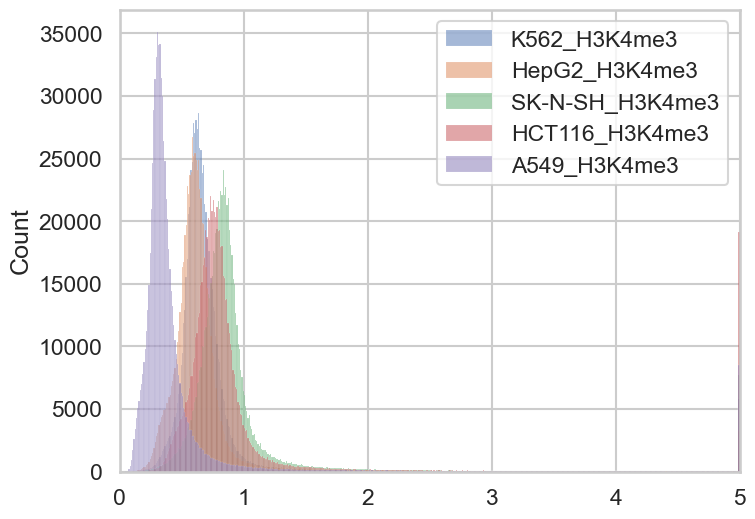

In [41]:
for col in MPRA_df.columns:
    if 'H3K4me3' in col:
        x = np.array(MPRA_df[col])
        x[x>5] = 5
        sns.histplot(x, label=col, binwidth=1e-2, alpha=0.5)
plt.xlim(0, 5)
plt.legend()